In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget

In [2]:
import numpy as np
import umap
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bioAI.mplstyle')

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)
#board += center

gridmodule = GridModule(center,orientation_offset,f,non_negative=False,add=True)

In [4]:
phases = gridmodule.inner_hexagon.sample(10,seed=3)
gridmodule.init_module(phases)
ratemaps = gridmodule(board)
masked_ratemaps = gridmodule.masked_ratemaps(board)
phases.shape, ratemaps.shape

((10, 2), (10, 64, 64))

(<Figure size 300x300 with 1 Axes>, <AxesSubplot:>)

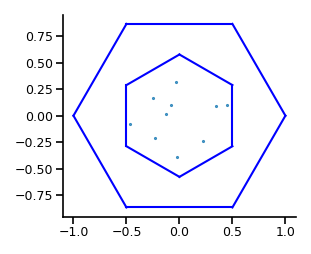

In [5]:
gridmodule.plot(figsize=(2,2))

(-0.5, 63.5, 63.5, -0.5)

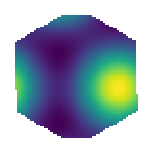

In [6]:
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(masked_ratemaps[0])
ax.axis('off')

## Check explained variance with n grid cells with PCA

In [7]:
pca = PCA(n_components=None)
pca.fit(masked_ratemaps.reshape(masked_ratemaps.shape[0],-1).T)

PCA()

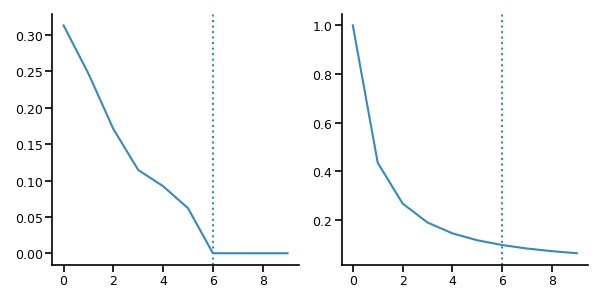

In [9]:
fig, axs = plt.subplots(ncols=2,figsize=(4,2))
#axs[0].plot(pca.singular_values_)
axs[0].plot(pca.explained_variance_ratio_)

# power law?
one_over_n = 1/np.arange(1,len(pca.singular_values_)+1)**1.2
axs[1].plot(one_over_n)
_=[ax.set_yscale('linear') for ax in axs]
_=[ax.axvline(6,ls=':') for ax in axs]